In [353]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Spotify_Most_Streamed.csv")

In [354]:
# Preprocessing

In [355]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Artist and Title  2500 non-null   object
 1   Streams           2500 non-null   object
 2   Daily             2497 non-null   object
dtypes: object(3)
memory usage: 58.7+ KB
None
                    Artist and Title        Streams      Daily
0       The Weeknd - Blinding Lights  3,783,983,806  1,736,378
1          Ed Sheeran - Shape of You  3,616,649,759  1,135,140
2  Lewis Capaldi - Someone You Loved  2,958,875,491  1,522,093
3            Post Malone - Sunflower  2,898,311,408  1,871,177
4         Tones And I - Dance Monkey  2,896,024,418    666,818


In [356]:
df = pd.read_csv("Spotify_Most_Streamed.csv")

df['Streams'] = (
    df['Streams']
    .astype(str)
    .str.replace(',', '', regex=False)
    .astype(float)
)

df[['Artist', 'Title']] = df['Artist and Title'].str.split(' - ', n=1, expand=True)

top50 = df.sort_values('Streams', ascending=False).head(50)

print("Streams dtype:", df['Streams'].dtype)
print("Top 5 Songs by Streams:\n", top50[['Artist', 'Title', 'Streams']].head())

Streams dtype: float64
Top 5 Songs by Streams:
           Artist              Title       Streams
0     The Weeknd    Blinding Lights  3.783984e+09
1     Ed Sheeran       Shape of You  3.616650e+09
2  Lewis Capaldi  Someone You Loved  2.958875e+09
3    Post Malone          Sunflower  2.898311e+09
4    Tones And I       Dance Monkey  2.896024e+09


In [357]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist and Title  2500 non-null   object 
 1   Streams           2500 non-null   float64
 2   Daily             2497 non-null   object 
 3   Artist            2500 non-null   object 
 4   Title             2499 non-null   object 
dtypes: float64(1), object(4)
memory usage: 97.8+ KB
None
                    Artist and Title       Streams      Daily         Artist  \
0       The Weeknd - Blinding Lights  3.783984e+09  1,736,378     The Weeknd   
1          Ed Sheeran - Shape of You  3.616650e+09  1,135,140     Ed Sheeran   
2  Lewis Capaldi - Someone You Loved  2.958875e+09  1,522,093  Lewis Capaldi   
3            Post Malone - Sunflower  2.898311e+09  1,871,177    Post Malone   
4         Tones And I - Dance Monkey  2.896024e+09    666,818    Tones And I   

               Title  
0  

In [358]:
# Missing values
print("\nMissing values:")
print(df.isna().sum())

# There are 3 missing values in the "Daily" column. I will not adjust it nor drop the column--> 
# -->as the "Daily" column is not being used in this analysis anyways.


Missing values:
Artist and Title    0
Streams             0
Daily               3
Artist              0
Title               1
dtype: int64


In [359]:
# Removing duplicates
df = df.drop_duplicates()

In [360]:
print("Streams dtype:", df['Streams'].dtype)
print("Any missing Streams:", df['Streams'].isna().sum())
print("Top 5 Songs by streams:")
display(df.sort_values('Streams', ascending=False)[['Artist','Title','Streams']].head())

Streams dtype: float64
Any missing Streams: 0
Top 5 Songs by streams:


,Artist,Title,Streams
0,The Weeknd,Blinding Lights,3.783984e+09
1,Ed Sheeran,Shape of You,3.616650e+09
2,Lewis Capaldi,Someone You Loved,2.958875e+09
3,Post Malone,Sunflower,2.898311e+09
4,Tones And I,Dance Monkey,2.896024e+09


In [361]:
#-----------------------------------------------------------------------------------------------------------------------

In [362]:
# Of the top 50 songs streamed in 2023 on spotify, how many songs does each-->
# -->artist have and what percentage of the top 50 do they make up? :

In [363]:
if df['Streams'].dtype == 'object':
    df['Streams'] = df['Streams'].str.replace(',', '', regex=False).astype(float)

df[['Artist','Title']] = df['Artist and Title'].str.split(' - ', n=1, expand=True)

top50 = df.sort_values('Streams', ascending=False).head(50)

artist_counts = top50['Artist'].value_counts()

artist_percent = (artist_counts / 50) * 100

result = pd.DataFrame({
    'Songs in Top 50': artist_counts,
    'Percentage of Top 50': artist_percent.round(2)
})

print(result)

                         Songs in Top 50  Percentage of Top 50
Artist                                                        
Ed Sheeran                             4                   8.0
The Weeknd                             3                   6.0
Post Malone                            3                   6.0
Dua Lipa                               2                   4.0
Drake                                  2                   4.0
Imagine Dragons                        2                   4.0
Harry Styles                           2                   4.0
The Chainsmokers                       2                   4.0
XXXTENTACION                           2                   4.0
Billie Eilish                          2                   4.0
Ariana Grande                          1                   2.0
OneRepublic                            1                   2.0
Travis Scott                           1                   2.0
Twenty One Pilots                      1               

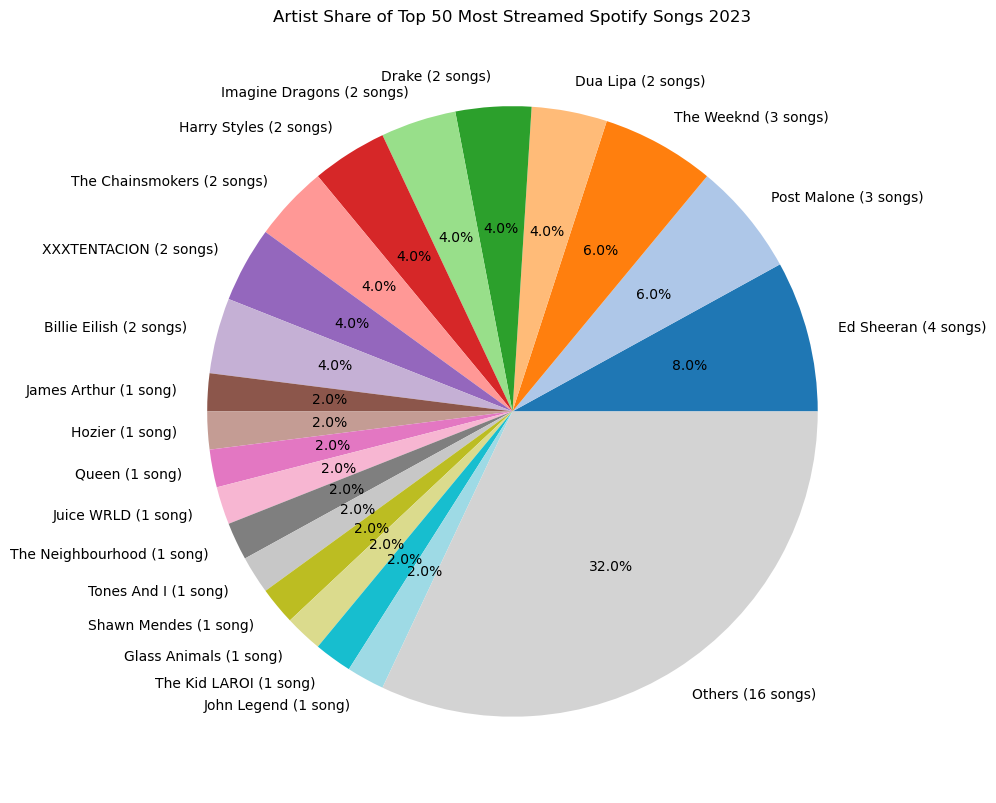

In [364]:
result_sorted = result.sort_values('Songs in Top 50', ascending=False)

top_n = 20
top = result_sorted.head(top_n)
other = result_sorted.iloc[top_n:].sum()

plot_data = top.copy()
plot_data.loc['Others'] = other

labels = [
    f"{artist} ({int(count)} song)" if int(count) == 1
    else f"{artist} ({int(count)} songs)"
    for artist, count in zip(plot_data.index, plot_data['Songs in Top 50'])
]

colors = list(plt.cm.tab20.colors[:top_n]) + ['lightgrey']

plt.figure(figsize=(10,10))
plt.pie(plot_data['Songs in Top 50'], labels=labels, autopct='%1.1f%%', colors=colors)

plt.title("Artist Share of Top 50 Most Streamed Spotify Songs 2023")
plt.tight_layout()
plt.show()

In [365]:
# List of the top 50 Songs of 2024 in descending order for reference :

In [366]:
top50_list = top50[['Title','Artist','Streams']].sort_values('Streams', ascending=False)

print(top50_list.to_string(index=False))

                   Title                  Artist      Streams
         Blinding Lights              The Weeknd 3783983806.0
            Shape of You              Ed Sheeran 3616649759.0
       Someone You Loved           Lewis Capaldi 2958875491.0
               Sunflower             Post Malone 2898311408.0
            Dance Monkey             Tones And I 2896024418.0
               One Dance                   Drake 2770548672.0
                rockstar             Post Malone 2763808309.0
                    STAY           The Kid LAROI 2738183590.0
                 Starboy              The Weeknd 2658550411.0
                Believer         Imagine Dragons 2654895028.0
               As It Was            Harry Styles 2647133145.0
              Heat Waves           Glass Animals 2631653042.0
                  Closer        The Chainsmokers 2628670123.0
                 Perfect              Ed Sheeran 2621255983.0
               SeÃ±orita            Shawn Mendes 2523466357.0
    Say 

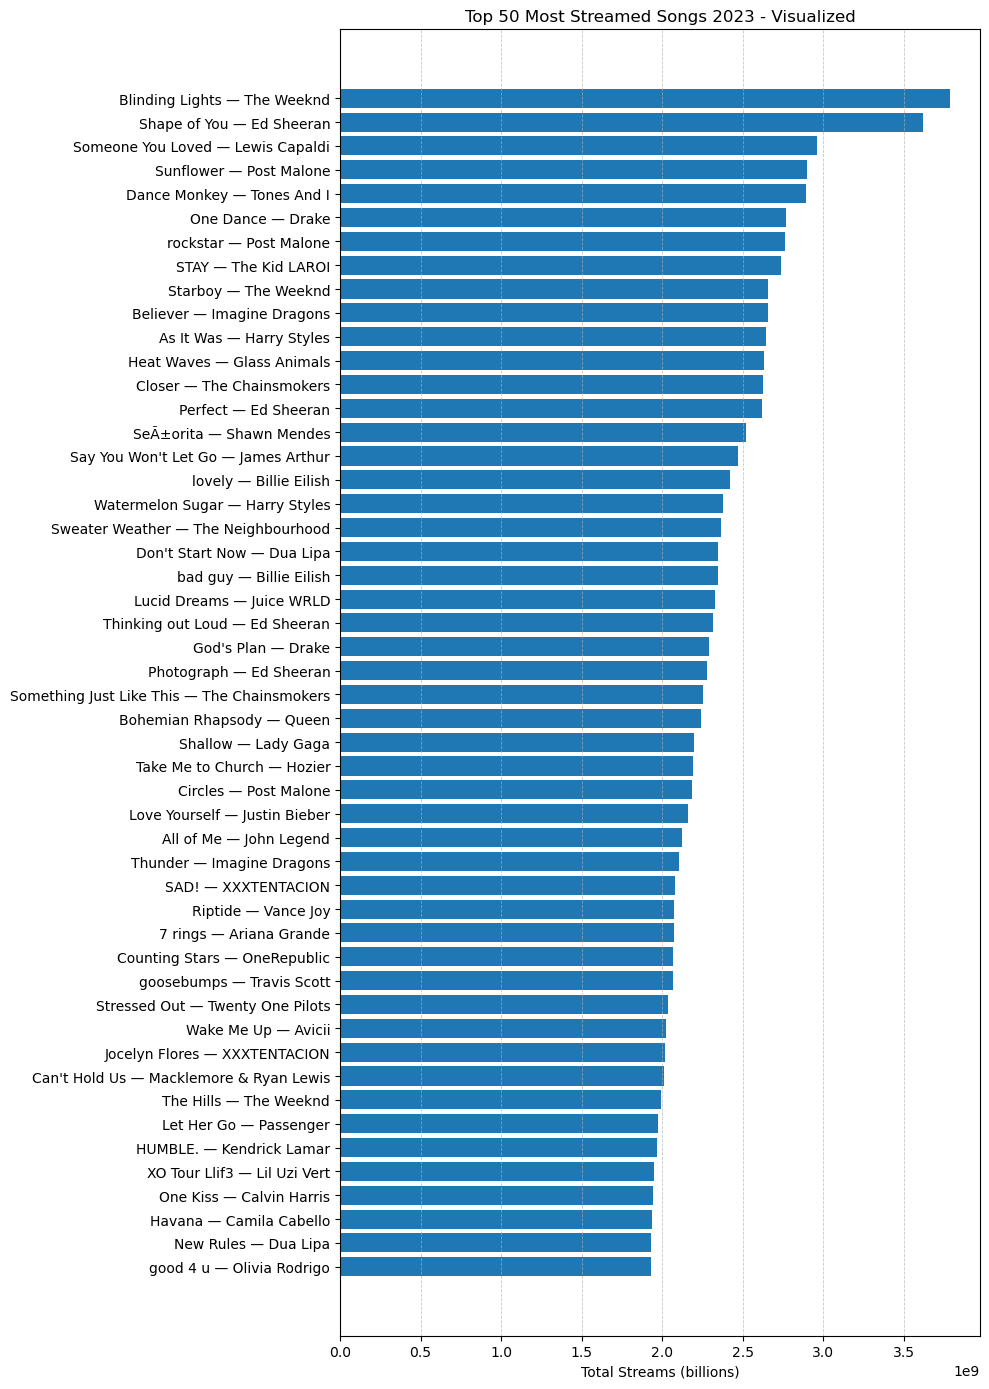

In [367]:
chart_data = top50[['Title','Artist','Streams']].sort_values('Streams', ascending=True)

chart_data['Label'] = chart_data['Title'] + " — " + chart_data['Artist']

plt.figure(figsize=(10,14))
plt.barh(chart_data['Label'], chart_data['Streams'])

plt.xlabel("Total Streams (billions)")
plt.title("Top 50 Most Streamed Songs 2023 - Visualized")

plt.grid(axis='x', linestyle='--', linewidth=0.6, alpha=0.7)

plt.tight_layout()
plt.show()

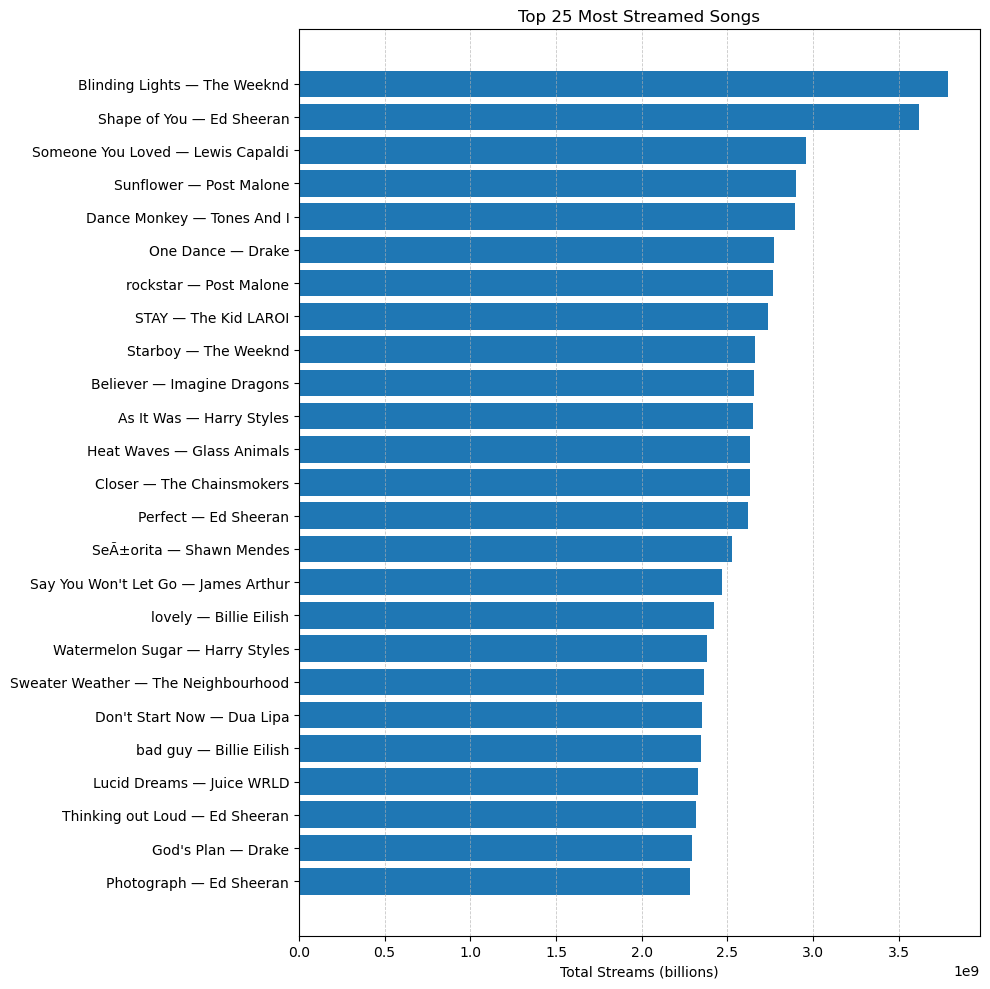

In [368]:
top25 = top50.sort_values('Streams', ascending=False).head(25)

chart_data = top25[['Title','Artist','Streams']].sort_values('Streams', ascending=True)

chart_data['Label'] = chart_data['Title'] + " — " + chart_data['Artist']

plt.figure(figsize=(10,10))
plt.barh(chart_data['Label'], chart_data['Streams'])

plt.xlabel("Total Streams (billions)")
plt.title("Top 25 Most Streamed Songs")

plt.grid(axis='x', linestyle='--', linewidth=0.6, alpha=0.7)

plt.tight_layout()
plt.show()

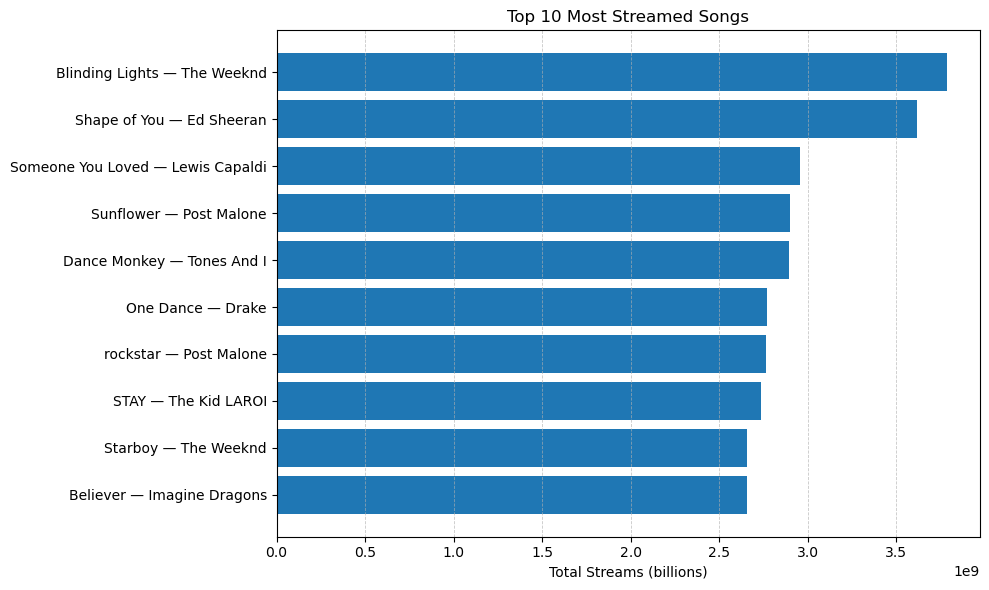

In [369]:
top10 = top50.sort_values('Streams', ascending=False).head(10)

chart_data = top10[['Title','Artist','Streams']].sort_values('Streams', ascending=True)

chart_data['Label'] = chart_data['Title'] + " — " + chart_data['Artist']

plt.figure(figsize=(10,6))
plt.barh(chart_data['Label'], chart_data['Streams'])

plt.xlabel("Total Streams (billions)")
plt.title("Top 10 Most Streamed Songs")

plt.grid(axis='x', linestyle='--', linewidth=0.6, alpha=0.7)

plt.tight_layout()
plt.show()

In [370]:
# The basic statistics of the top 50 songs :

In [371]:
mean_streams = top50['Streams'].mean()
std_streams = top50['Streams'].std()
min_streams = top50['Streams'].min()
max_streams = top50['Streams'].max()

print("Mean:", f"{mean_streams:,.0f}")
print("Standard deviation:", f"{std_streams:,.0f}")
print("Minimum:", f"{min_streams:,.0f}")
print("Maximum:", f"{max_streams:,.0f}")

Q1 = top50['Streams'].quantile(0.25)
Q3 = top50['Streams'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = top50[(top50['Streams'] > upper_bound) | (top50['Streams'] < lower_bound)]

Mean: 2,357,434,145
Standard deviation: 404,438,639
Minimum: 1,930,339,344
Maximum: 3,783,983,806


Mean: 2,357,434,145
Standard deviation: 404,438,639
Minimum: 1,930,339,344
Maximum: 3,783,983,806


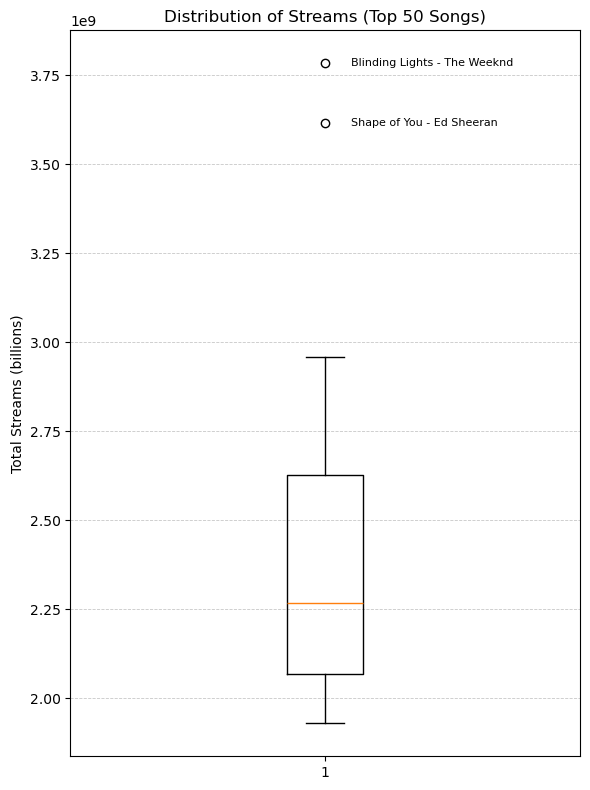

In [372]:
mean_streams = top50['Streams'].mean()
std_streams = top50['Streams'].std()
min_streams = top50['Streams'].min()
max_streams = top50['Streams'].max()

print("Mean:", f"{mean_streams:,.0f}")
print("Standard deviation:", f"{std_streams:,.0f}")
print("Minimum:", f"{min_streams:,.0f}")
print("Maximum:", f"{max_streams:,.0f}")

Q1 = top50['Streams'].quantile(0.25)
Q3 = top50['Streams'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = top50[(top50['Streams'] > upper_bound) | (top50['Streams'] < lower_bound)]

import matplotlib.pyplot as plt

plt.figure(figsize=(6,8))
plt.boxplot(top50['Streams'], vert=True)

plt.ylabel("Total Streams (billions)")
plt.title("Distribution of Streams (Top 50 Songs)")

plt.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.7)

for _, row in outliers.iterrows():
    plt.text(
        1.05,
        row['Streams'],
        f"{row['Title']} - {row['Artist']}",
        fontsize=8,
        va='center'
    )

plt.tight_layout()
plt.show()

In [373]:
# Within the top 50, do artists with more entries account for more listening volume?

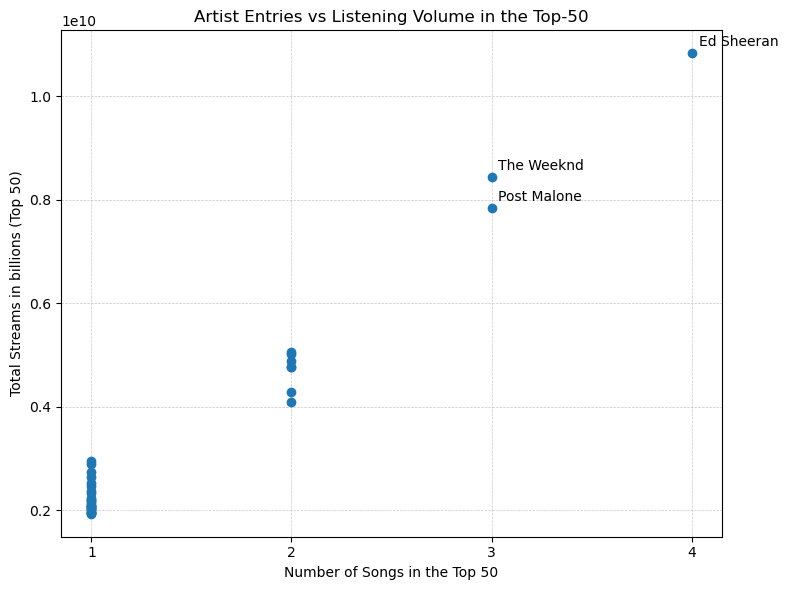

In [374]:
import matplotlib.ticker as ticker

artist_analysis = top50.groupby('Artist').agg(
    songs_in_top50=('Title', 'count'),
    total_streams=('Streams', 'sum')
).reset_index()

top3 = artist_analysis.nlargest(3, 'total_streams')


plt.figure(figsize=(8,6))

plt.plot(
    artist_analysis['songs_in_top50'],
    artist_analysis['total_streams'],
    'o',
    markersize=6
)

for _, row in top3.iterrows():
    plt.annotate(
        row['Artist'],
        (row['songs_in_top50'], row['total_streams']),
        xytext=(5,5),
        textcoords='offset points'
    )

plt.xlabel("Number of Songs in the Top 50")
plt.ylabel("Total Streams in billions (Top 50)")
plt.title("Artist Entries vs Listening Volume in the Top-50")

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

In [375]:
# Which artists have the highest streams per song? One hit wonder metric! :

In [376]:
artist_one_hit = top50.groupby('Artist').agg(
    songs_in_top50=('Title', 'count'),
    total_streams=('Streams', 'sum')
)

artist_one_hit['avg_streams_per_song'] = artist_one_hit['total_streams'] / artist_one_hit['songs_in_top50']

artist_one_hit = artist_one_hit.sort_values('avg_streams_per_song', ascending=False)

artist_one_hit.head(10)

,songs_in_top50,total_streams,avg_streams_per_song
Artist,,,
Lewis Capaldi,1,2.958875e+09,2.958875e+09
Tones And I,1,2.896024e+09,2.896024e+09
The Weeknd,3,8.437829e+09,2.812610e+09
The Kid LAROI,1,2.738184e+09,2.738184e+09
Ed Sheeran,4,1.083153e+10,2.707883e+09
Glass Animals,1,2.631653e+09,2.631653e+09
Post Malone,3,7.846836e+09,2.615612e+09
Drake,2,5.064319e+09,2.532160e+09
Shawn Mendes,1,2.523466e+09,2.523466e+09


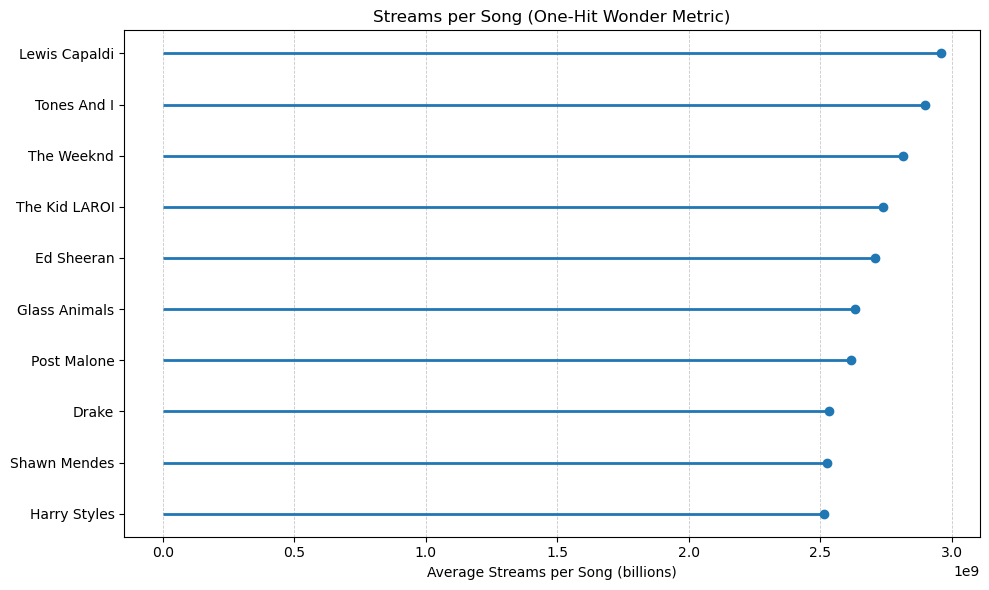

In [377]:
top10 = artist_one_hit.head(10)[::-1]

plt.figure(figsize=(10,6))

plt.hlines(
    y=top10.index,
    xmin=0,
    xmax=top10['avg_streams_per_song'],
    linewidth=2
)

plt.plot(
    top10['avg_streams_per_song'],
    top10.index,
    'o'
)

plt.xlabel("Average Streams per Song (billions)")
plt.title("Streams per Song (One-Hit Wonder Metric)")

plt.grid(axis='x', linestyle='--', linewidth=0.6, alpha=0.7)

plt.tight_layout()
plt.show()